In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import preprocessing

In [ ]:
df=pd.read_excel('/content/heart_disease[1].xlsx',sheet_name='Heart_disease',header=0)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
df['fbs'].unique()

array([ True, False])

In [ ]:
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [ ]:
df['exang']=df['exang'].replace({'FALSE':False,'TURE':True})

<ipython-input-12-f664c09f199c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang']=df['exang'].replace({'FALSE':False,'TURE':True})


In [ ]:
for col in df.columns:
  print(f'unique values in {col}: {df[col].unique()}\n')

unique values in age: [63 41 57 52 66 56 48 53 30 54 37 46 68 76 58 42 64 71 69 45 44 39 62 50
 55 49 43 51 36 59 61 60 67 70 47 65 38 34 35 29 74 75 40 72 31 73 33 32
 77]

unique values in sex: ['Male' 'Female']

unique values in cp: ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']

unique values in trestbps: [145 135 140 118 110 160 130 155 170 150 125 120 142 100 102 112 146 138
 134 122 136 108 115 104 128 106 156 129 124 126 132 105 152 148  94 180
 178 101 172  80 114 190 113 154 175 133 131 181 188 193 153 179 143  90
  96 163 161 196 107 167 174 158 192 185 144 169  95  92 200 127 121 166
 177 165 117 116 184  97 186 164 123 151   0 137 182]

unique values in chol: [233 203 192 186 201 228 276 211 260 175 237 226 273 197 240 250 177 248
 265 303 149 234 160 264 242 302 278 220 294 394 214 219 271 213 245 196
 209 141 340 318 243 238 222 208 236 178 275 308 223 204 269 256 180 360
 239 235 262 257 295 417 212 254 283 244 315 306 342 267 198 215 304 247
 266 252

In [ ]:
df['fbs']=df['fbs'].astype(int)
df['exang']=df['exang'].astype(int)
df[['fbs','exang']].head()

,fbs,exang
0,1,0
1,0,0
2,0,0
3,0,0
4,0,1


In [ ]:
df['sex']=df['sex'].map({'Male':1,'Female':0})

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
df['oldpeak'].fillna(df['oldpeak'].median(),inplace=True)

<ipython-input-19-22afad7dfabe>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].median(),inplace=True)


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [ ]:
cat_cols=['cp','restecg','slope','thal']
df_encoded=pd.get_dummies(df, columns=cat_cols,drop_first=False)
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0,2.3,0,False,False,False,True,True,False,False,True,False,False,True,False,False
1,41,1,135,203,0,132,0,0.0,0,False,True,False,False,False,True,False,False,True,False,True,False,False
2,57,1,140,192,0,148,0,0.4,0,True,False,False,False,False,True,False,False,True,False,True,False,False
3,52,1,118,186,0,190,0,0.0,0,False,False,False,True,True,False,False,False,True,False,True,False,False
4,57,1,110,201,0,126,1,1.5,0,True,False,False,False,False,True,False,False,True,False,True,False,False


In [ ]:
df_encoded.dtypes

,0
age,int64
sex,int64
trestbps,int64
chol,int64
fbs,int64
thalch,int64
exang,int64
oldpeak,float64
num,int64
cp_asymptomatic,bool


In [ ]:
df_encoded=df_encoded.astype(int)

In [ ]:
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0,2,0,0,0,0,1,1,0,0,1,0,0,1,0,0
1,41,1,135,203,0,132,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
2,57,1,140,192,0,148,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
3,52,1,118,186,0,190,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0
4,57,1,110,201,0,126,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0


In [ ]:
x=df_encoded.drop(columns=['num'])
y=df_encoded['num']
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(726, 21) (182, 21) (726,) (182,)


In [ ]:
model=DecisionTreeClassifier(criterion='gini',class_weight='balanced',max_depth=5,min_samples_split=4,random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=4, random_state=42)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print('accuracy:', accuracy_score(y_test,y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('classification report:\n',classification_report(y_test,y_pred,zero_division=1))

accuracy: 0.5274725274725275
confusion matrix:
 [[62 15  8  3  1]
 [10 25  6  7  0]
 [ 2  6  5  7  2]
 [ 2  8  1  4  2]
 [ 1  1  3  1  0]]
classification report:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75        89
           1       0.45      0.52      0.49        48
           2       0.22      0.23      0.22        22
           3       0.18      0.24      0.21        17
           4       0.00      0.00      0.00         6

    accuracy                           0.53       182
   macro avg       0.33      0.34      0.33       182
weighted avg       0.56      0.53      0.54       182



In [ ]:
np.unique(y_pred)

array([0, 1, 2, 3, 4])

In [ ]:
df['num'].value_counts()

,count
num,
0,399
1,265
2,109
3,107
4,28


In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)
model.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=5, random_state=42)

In [ ]:
y_pred_resampled=model.predict(x_test)

In [ ]:
print('accuracy', accuracy_score(y_test,y_pred_resampled))

accuracy 0.4835164835164835


In [ ]:
print(confusion_matrix(y_test,y_pred_resampled))
print(classification_report(y_test,y_pred_resampled))

[[58 20  8  1  2]
 [ 8 25 10  0  5]
 [ 2 10  4  1  5]
 [ 1  5  7  0  4]
 [ 1  2  2  0  1]]
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        89
           1       0.40      0.52      0.45        48
           2       0.13      0.18      0.15        22
           3       0.00      0.00      0.00        17
           4       0.06      0.17      0.09         6

    accuracy                           0.48       182
   macro avg       0.28      0.30      0.28       182
weighted avg       0.53      0.48      0.50       182



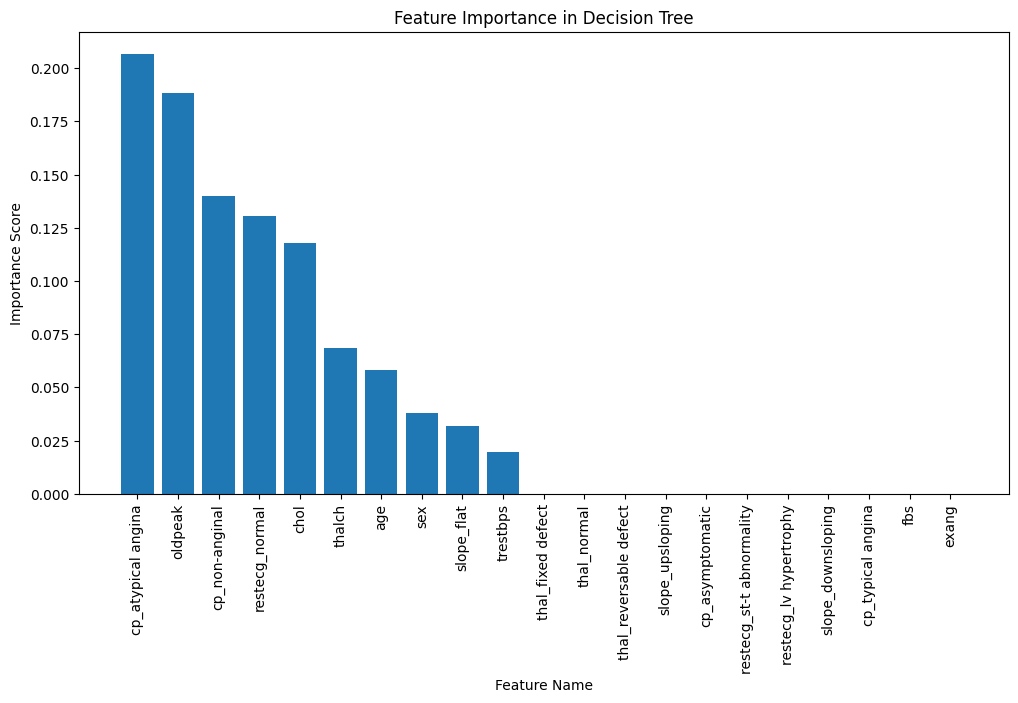

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance nikalna
feature_importance = model.feature_importances_

# Features ke naam
feature_names = x_train.columns

# Sort karna importance ke basis pe
indices = np.argsort(feature_importance)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importance in Decision Tree")
plt.bar(range(len(feature_importance)), feature_importance[indices], align="center")
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
# Features to drop based on low importance
low_importance_features = [
    'exang', 'fbs', 'slope_downsloping', 'restecg_lv hypertrophy',
    'cp_typical angina', 'slope_upsloping', 'thal_reversable defect', 'thal_normal'
]

# Drop low importance features
X_train = x_train.drop(columns=low_importance_features)
X_test = x_test.drop(columns=low_importance_features)

# Train Decision Tree Model
model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=5)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


Accuracy: 0.5824175824175825
Confusion Matrix:
 [[68 13  5  3  0]
 [14 27  3  4  0]
 [ 2 10  8  2  0]
 [ 4  7  3  3  0]
 [ 1  2  1  2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        89
           1       0.46      0.56      0.50        48
           2       0.40      0.36      0.38        22
           3       0.21      0.18      0.19        17
           4       0.00      0.00      0.00         6

    accuracy                           0.58       182
   macro avg       0.37      0.37      0.37       182
weighted avg       0.56      0.58      0.57       182



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df_encoded.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak',
       'num', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'slope_downsloping', 'slope_flat',
       'slope_upsloping', 'thal_fixed defect', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
best_model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred_best = best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best,zero_division=1))

Best Model Accuracy: 0.5604395604395604
Confusion Matrix:
 [[67 19  0  3  0]
 [12 31  0  5  0]
 [ 2 15  0  5  0]
 [ 3 10  0  4  0]
 [ 1  3  0  2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77        89
           1       0.40      0.65      0.49        48
           2       1.00      0.00      0.00        22
           3       0.21      0.24      0.22        17
           4       1.00      0.00      0.00         6

    accuracy                           0.56       182
   macro avg       0.68      0.33      0.30       182
weighted avg       0.66      0.56      0.53       182



In [ ]:
best_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=5)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [ ]:
y_pred_best = best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best,zero_division=1))

Best Model Accuracy: 0.5769230769230769
Confusion Matrix:
 [[68 14  4  3  0]
 [14 26  4  4  0]
 [ 2 10  8  2  0]
 [ 4  7  3  3  0]
 [ 1  2  1  2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        89
           1       0.44      0.54      0.49        48
           2       0.40      0.36      0.38        22
           3       0.21      0.18      0.19        17
           4       1.00      0.00      0.00         6

    accuracy                           0.58       182
   macro avg       0.56      0.37      0.36       182
weighted avg       0.59      0.58      0.57       182



Decision Tree Classification Report

1. Introduction
The objective of this study was to build a Decision Tree Classification model to predict outcomes using the given dataset. The tasks included data preprocessing, training a Decision Tree model, hyperparameter tuning, and evaluating its performance.

2. Data Preprocessing

Handled missing values where necessary.

Scaled numerical features for better model performance.

Applied encoding techniques for categorical variables.

3. Model Implementation

Used 80-20 split for training and testing.

Implemented a Decision Tree Classifier using scikit-learn.

Optimized hyperparameters such as max_depth, min_samples_split, and criterion using GridSearchCV.

4. Model Performance

Best Model Accuracy: 57.69% (0.5769)

Confusion Matrix:

[[68 14  4  3  0]

 [14 26  4  4  0]

 [ 2 10  8  2  0]

 [ 4  7  3  3  0]

 [ 1  2  1  2  0]]

Classification Report:

Precision:  Varies across classes, highest for class 0 (76%).

Recall:     Best recall for class 0 (76%), weaker for others.

F1-Score:   Balanced for class 0 (76%), lower for other classes.

5. Hyperparameter Tuning Results

Best Parameters Found:

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}

The optimized model slightly improved classification but still struggles with minority classes.

6. Conclusion & Next Steps

The Decision Tree model achieved 57% accuracy, which provides a baseline for further improvements.

Model performance can be enhanced using ensemble methods (Random Forest, Boosting).

Feature selection and additional data preprocessing may further optimize classification results.




---

1. what are some common hyperparameters of decision tree models, and how do they affect the model's performance?

common hyperparameters and their imoact:
criterion(gini/entropy): determines how splits are made. gini is faster, while entropy provides more balanced splits.

max depth: limits the depthh of the treeto prevent overfitting.A smaller value generalises better, while a larger depth may lead to overfitting.

min samples split: the min number of samples required to split an internal node. Higher values prevent the tree from growing too complex.

min samples leaf:The minimum number of samples allowed in a leaf node. A higher value reduces overfitting.

max features:Limits the number of features considered for splitting at each node, improving generalization.




---

2. wht is the difference between label encoding and one hot encoding?

label encoding: assigns numerical labels to categorical values (eg, 'red'-->0, 'blue'-->1,'green'-->2). used whenn categories have an ordinal relationship.

one hot encoding: converts categorical variables into binary columns(eg.,'red-->[1,0,0],'blue'-->[0,1,0],'green'-->[0,0,1]). used for non-ordinal categorical data.